# <h3 align="center">__Module 2 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 2__</h3>
# <h3 align="center">__Due at the end of Module 2__</h3><br>



# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic. 

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# __1. Module 2__<br>

A covariance matrix is a square matrix that captures the pairwise covariance between multiple variables in a dataset. Each element $C[i,j]$ represents the covariance between the $i$-th and $j$-th variables. Diagonal elements represent variances of individual variables.

Why is it Important?

* Multivariate Relationships: It helps understand how variables move together (positive/negative correlation).
* Dimensionality Reduction: It's the foundation of techniques like Principal Component Analysis (PCA).
* Data Representation: Useful for understanding the structure of multivariate data in fields like finance, image processing, and machine learning.

The Mathematical Definition is:

$$Cov(X,Y) = \frac{\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{n-1}

The matrix representation is: 

\begin{bmatrix}
\text{Cov}(X_1, X_1) & \text{Cov}(X_1, X_2) & \dots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Cov}(X_2, X_2) & \dots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \dots & \text{Cov}(X_n, X_n)
\end{bmatrix}


### Without using any Python packages like `numpy` or `pandas`, write a function to calculate the covariance matrix for a given dataset. 

In [170]:
def compute_covariance_matrix(data):
    """
    Compute the covariance matrix for a given dataset.
    Input: data - A 2D list where each inner list is a variable (e.g., [[X], [Y]])
    Output: Covariance matrix as a 2D list
    """
    # Get the mean of each feature
    # Formula: mean = sum(x) / count(x)
    feature_means = [sum(feature) / len(feature) for feature in data]
    
    # get the number of data points (n) and the number of features (d)
    num_samples = len(data[0])
    num_features = len(data)

    # initialize the covariance matrix (d x d) with zeros
    covariance_matrix = [[0] * num_features for i in range(num_features)]

    # iterate over the number of features (x and y) in the dataset
    for feature_x_index in range(num_features):
        # calculate variance for each feature dynamically
        for feature_y_index in range(num_features):
            
            covariance_sum = 0
            
            # iterate over the number of samples to calculate product of deviations
            for sample_index in range(num_samples):
                covariance_sum += (
                    # Formula: (x - mean(x)) * (y - mean(y))
                    (data[feature_x_index][sample_index] - feature_means[feature_x_index]) * 
                    (data[feature_y_index][sample_index] - feature_means[feature_y_index])
                )
            
            # store and normalize the covariance value by dividing by (n - 1)
            covariance_matrix[feature_x_index][feature_y_index] = covariance_sum / (num_samples - 1)

    return covariance_matrix

### Use your new covariance matrix function to compute the covariance matrix of the first 5 rows of the iris dataset. 

In [171]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# iris is a Bunch object, similar to a dictionary, containing data and metadata
# The features (measurements) of the Iris dataset are stored in 'data'
iris_data = iris.data

# organize the data by feature (columns) 
organized_data = [iris_data[:5, feature_index].tolist() for feature_index in range(iris_data.shape[1])]
    
# compute the covariance matrix
covariance_matrix = compute_covariance_matrix(organized_data)

# get the feature names
feature_names = iris.feature_names

# print first five rows of the Iris dataset
print('First five rows of the Iris dataset:')
for row in iris_data[:5]:  
    print(row)

print('\nCovariance matrix:')
# print in a readable format
header_row = "{:<20}".format("") + "".join(["{:>15}".format(name) for name in feature_names])
print(header_row)

# print the covariance matrix row by row
for feature_name, covariance_row in zip(feature_names, covariance_matrix):
    row_label = "{:<20}".format(feature_name)
    row_values = "".join(["{:>15.4f}".format(value) for value in covariance_row])
    print(row_label + row_values)

First five rows of the Iris dataset:
[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]

Covariance matrix:
                    sepal length (cm)sepal width (cm)petal length (cm)petal width (cm)
sepal length (cm)            0.0430         0.0365        -0.0025         0.0000
sepal width (cm)             0.0365         0.0670        -0.0025         0.0000
petal length (cm)           -0.0025        -0.0025         0.0050         0.0000
petal width (cm)             0.0000         0.0000         0.0000         0.0000


### Discuss the relationship between the variables.

## Sepal Length and Sepal Width
### 
- Positive covariance value of 0.0365 indicates proportional relationship between both features
- As sepal length increases, sepal width increases as well
- Small covariance indicates that the relationship is not very strong
###

## Sepal Length and Petal Width
### 
- Negative covariance of -0.0025 implies weak inverse relationship, and that those features are relatively independent
- As sepal length increases, petal length slightly decreases
- Small covariance indicates that the relationship is not very strong
###

## Sepal Width and Petal Width 
### 
- Covariance values involving petal width are consistently 0 across all pairs of features
- Petal width is always the same 
###

## Reading Diagonally for Variances
###
- Sepal width has the highest variance, at 0.067, showing that its values are more spread out than the other features
- Sepal length is the second highest, at 0.043
- Petal length has the least variability, at 0.005, excluding petal width 
###

### Plot data points for 2 of the variables in the dataset and show how the covariance matrix reflects the orientation and spread of data.

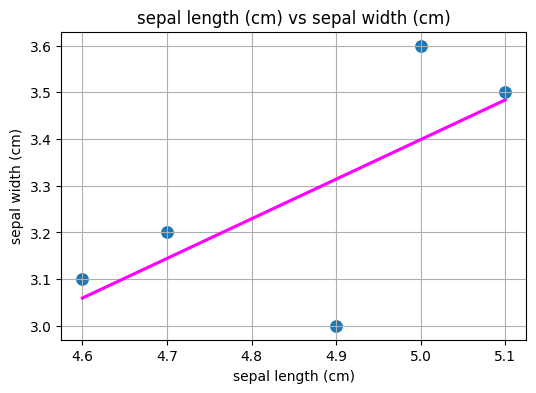

In [172]:
# Create plots here
import matplotlib.pyplot as plt
import seaborn as sns

# index for sepal length 
x_index = 0  
# index for sepal width
y_index = 1 

# Create plot with scatter 
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=iris_data[:5, x_index],
    y=iris_data[:5, y_index],
    s=100
)
# Add regression line
sns.regplot(
    x=iris_data[:5, x_index],
    y=iris_data[:5, y_index],
    scatter=False,
    line_kws={"color": "magenta"},
    ci=None
)

# Add labels and title
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])
plt.title(f"{feature_names[x_index]} vs {feature_names[y_index]}")
plt.grid(True)
plt.show()

# References
[1] Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. Introduction to
Algorithms, Third Edition. MIT Press and McGraw-Hill, 2009. ISBN-13: 978-0-262-03384-8<br><br>